# Exercicis d'algoritmes d'Agrupació.

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Data/'

/content/drive/MyDrive/Data


In [4]:
df= pd.read_csv('Publicacions Facebook Thailandia.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


# Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

Delete the last four columns since are empty

In [5]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [6]:
df = df.iloc[:, :-4]

Delete status_id and status_published since we don't need them to make clusters.

In [7]:
df = df.drop(['status_id', 'status_published'], axis = 1)

We check if num_reactions = num_likes + num_loves + num_wows + num_hahas + num_sads + num_angrys by getting the ones that don't follow the assumption.

In [8]:

df.loc[df['num_reactions'] != (df.num_likes + df.num_loves + df.num_wows + df.num_hahas + df.num_sads + df.num_angrys)]


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
238,video,885,462,26,659,220,0,2,0,0
247,photo,264,2,0,256,2,5,0,0,0
248,photo,313,3,0,297,7,6,0,0,0
251,photo,247,6,0,234,9,1,0,0,0
253,photo,387,3,0,368,16,1,0,0,0
254,photo,178,9,0,170,6,0,0,0,0
256,photo,270,3,0,256,10,3,0,0,0
257,photo,351,4,1,344,6,0,0,0,0
293,video,616,523,21,459,125,21,8,0,1


In [9]:
len(df.loc[df['num_reactions'] != (df.num_likes + df.num_loves + df.num_wows + df.num_hahas + df.num_sads + df.num_angrys)])/len(df)*100

0.1276595744680851


Now we have two option as there are some rows that don't follow the assumption:

1- Delete the rows.

2- Change 'num_reactions' and get the correct sum.

As we assume these rows incorrent and it just represent less than 1% of the total database, we choose the option 1.

In [10]:
df = df.loc[df['num_reactions'] == (df.num_likes + df.num_loves + df.num_wows + df.num_hahas + df.num_sads + df.num_angrys)]
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [11]:
df = df.join(pd.get_dummies(df.status_type))
df = df.drop(['status_type'], axis=1)

In [12]:
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,0,1,0,0
7046,16,0,0,14,1,0,1,0,0,0,1,0,0
7047,2,0,0,1,1,0,0,0,0,0,1,0,0
7048,351,12,22,349,2,0,0,0,0,0,1,0,0


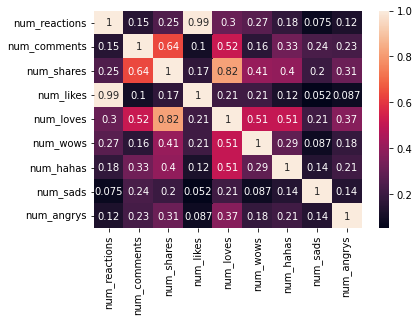

In [13]:
columns = df.iloc[:, :9].corr()

sns.heatmap(columns, annot=True)
plt.show()

We can see that the number of likes and reaccions have a hight correlation; also, the number of the loves and shares; and the number of shares and comments

### Scaling

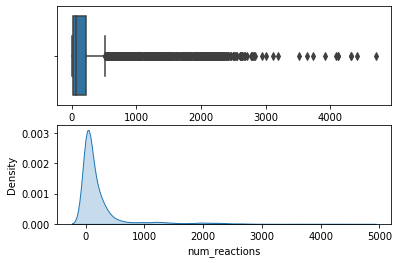

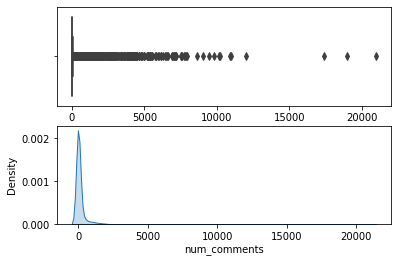

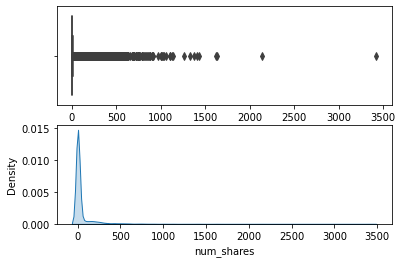

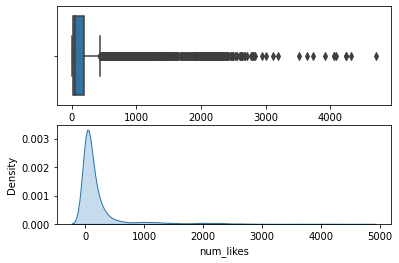

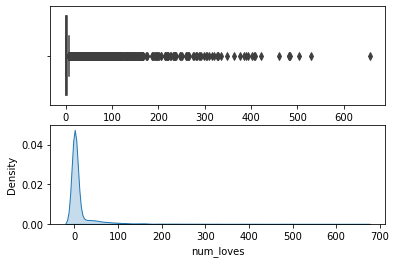

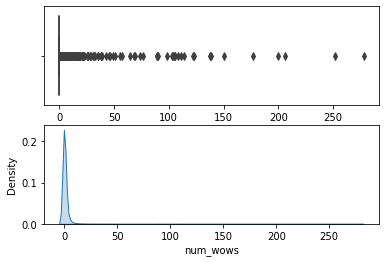

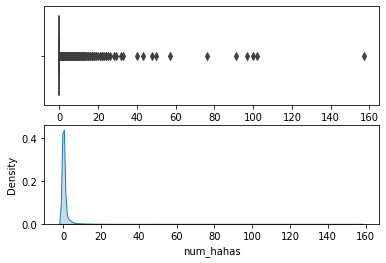

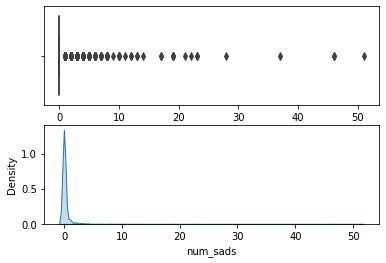

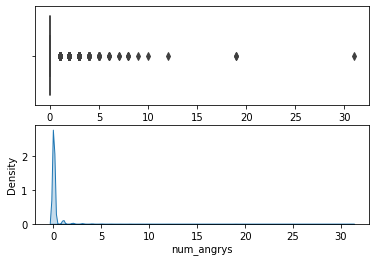

In [14]:
import warnings
warnings.filterwarnings('ignore')

trans = df.drop(['link', 'photo', 'status', 'video'], axis = 1)
#columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'year', 'month', 'day', ]
for i in columns:
  f, (ax_box, ax_kde) = plt.subplots(2)
  sns.boxplot(df[i], ax = ax_box)
  sns.kdeplot(df[i], ax = ax_kde, fill=True)

We  will do the proper data scalling with Standard scaler

In [15]:
from sklearn.preprocessing import StandardScaler

columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
robust = StandardScaler().fit(df[columns])
df[columns] = robust.transform(df[columns])

### PCA

We apply PCA and print the acumulative variance for each PCA component.

The main purpose of principal component analysis is to:

* identify hidden pattern in a data set,
* reduce the dimensionnality of the data by removing the noise and redundancy in the data,
* identify correlated variables

In [16]:
from sklearn.decomposition import PCA
df_nums = df.iloc[: , :9]
pca = PCA().fit(df_nums)

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.38342857, 0.57638541, 0.68358469, 0.77633994, 0.86442005,
       0.9414008 , 0.98363713, 1.        , 1.        ])

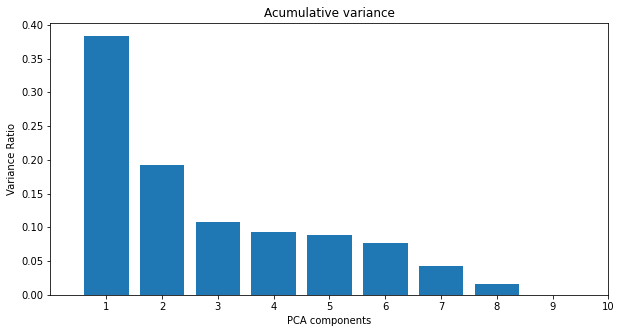

In [18]:
plt.figure(figsize = (10, 5))

plt.bar(range(1, len(pca.explained_variance_ratio_) +1 ), pca.explained_variance_ratio_)
plt.xlabel('PCA components')
plt.ylabel('Variance Ratio')
plt.xticks(np.arange(1,20))
plt.xlim([0,10])
plt.title('Acumulative variance')
plt.show()

In [19]:
pca = PCA(.95)
pca.fit(df_nums).n_components_

7

Although we should need 7 components to represent 95% of the data, we will use 4 components with 78% of representation

In [20]:
nums_names = list(df_nums.columns)
attributes_pca = pd.DataFrame({'Attribute' : nums_names, 'PC_1': pca.components_[0], 'PC_2': pca.components_[1], 'PC_3': pca.components_[2], 'PC_4': pca.components_[3]})
attributes_pca

,Attribute,PC_1,PC_2,PC_3,PC_4
0,num_reactions,0.308678,0.617164,0.077079,-0.014596
1,num_comments,0.349505,-0.241868,0.228748,-0.360064
2,num_shares,0.448769,-0.213614,-0.059119,-0.183209
3,num_likes,0.266142,0.652524,0.099515,-0.014684
4,num_loves,0.469326,-0.174687,-0.149151,-0.037308
5,num_wows,0.313562,0.007599,-0.440681,0.114481
6,num_hahas,0.319971,-0.150618,-0.165306,-0.098153
7,num_sads,0.169196,-0.130308,0.824178,0.045247
8,num_angrys,0.246460,-0.137662,0.072756,0.900100


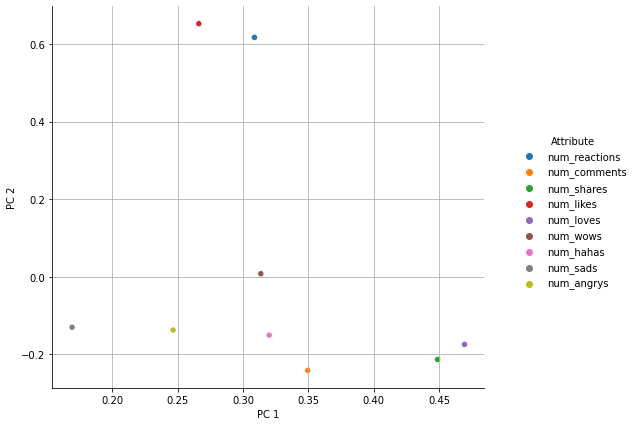

In [21]:

sns.pairplot(data = attributes_pca, x_vars = ['PC_1'], y_vars = ['PC_2'], hue = 'Attribute', 
             height = 6).fig.set_size_inches(9,6)
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.grid(True)
plt.show()

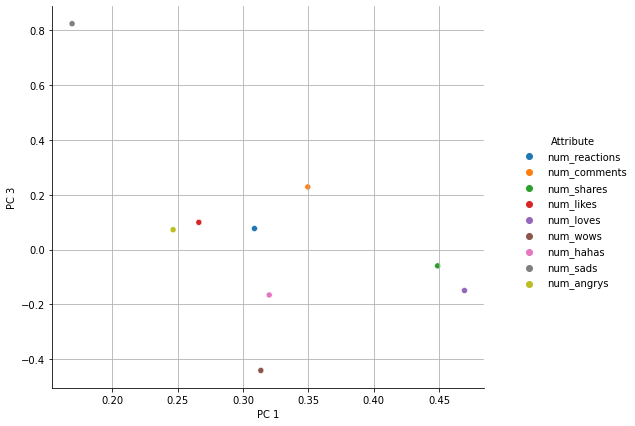

In [22]:
sns.pairplot(data = attributes_pca, x_vars = ['PC_1'], y_vars = ['PC_3'], hue = 'Attribute', 
             height = 6).fig.set_size_inches(9,6)
plt.xlabel("PC 1")
plt.ylabel("PC 3")

plt.grid(True)
plt.show()

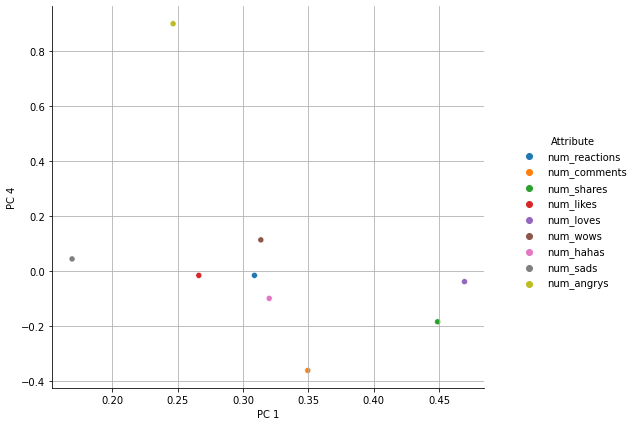

In [23]:
sns.pairplot(data = attributes_pca, x_vars = ['PC_1'], y_vars = ['PC_4'], hue = 'Attribute', 
             height = 6).fig.set_size_inches(9,6)
plt.xlabel("PC 1")
plt.ylabel("PC 4")

plt.grid(True)
plt.show()

With the information above we know how well represented are each variable through PCA's

PC 1 -> comments, shares, loves, wows and hahas

PC 2 -> reactions and likes

PC 3 -> sads

PC 4 -> angys

All atributes are well represented, we are going to apply PCA to data.

In [24]:
pca = PCA(n_components= 4)
pca.fit(df_nums)

df_pca = pd.DataFrame(pca.transform(df_nums), columns = [['PCA1', 'PCA2', 'PCA3', 'PCA4']])

df_pca.head()

,PCA1,PCA2,PCA3,PCA4
0,2.258185,-0.121835,0.054851,-0.619547
1,-0.632356,0.047523,-0.063074,0.016419
2,0.101729,-0.057165,-0.174042,-0.193858
3,-0.681450,-0.061079,-0.078201,0.018923
4,-0.452503,0.170490,-0.074277,0.004253


### Clustering

We are going to use the elbow method to see the most optimal number of clusters

In [25]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Optimal number of clusters:  3


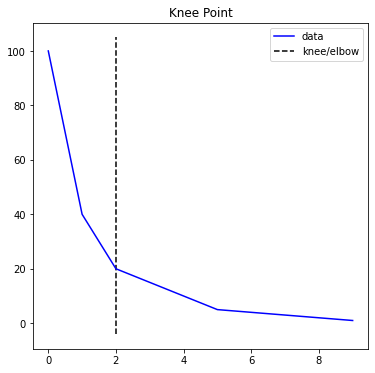

In [26]:
from sklearn.cluster import KMeans
from kneed import KneeLocator, DataGenerator as dg
import warnings
warnings.filterwarnings('ignore')

ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)


ks, inertias = dg.convex_decreasing()
kl = KneeLocator(ks, inertias, curve='convex', direction='decreasing')
kl.plot_knee()
print('Optimal number of clusters: ', kl.knee+1)

The plot shows that after 3 clusters, the change in the value of inertia is no longer significant, and most likely, neither is the variance of the rest of the data after te elbow point.

In [27]:
k_means = KMeans(n_clusters=3, random_state = 42)
k_means.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [28]:
y_pred = k_means.fit_predict(df_pca)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [29]:
df['KMeans_cluster'] = y_pred
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video,KMeans_cluster
0,0.646268,0.322998,1.685546,0.482821,1.987952,0.196563,0.076818,0.473080,-0.155671,0,0,0,1,0
1,-0.172675,-0.252216,-0.304302,-0.144294,-0.318023,-0.147431,-0.175810,-0.152687,-0.155671,0,1,0,0,0
2,-0.006294,0.012921,0.128604,-0.024208,0.208341,-0.032766,0.076818,-0.152687,-0.155671,0,0,0,1,0
3,-0.256947,-0.252216,-0.304302,-0.231022,-0.318023,-0.147431,-0.175810,-0.152687,-0.155671,0,1,0,0,0
4,-0.036545,-0.252216,-0.304302,-0.024208,-0.092439,-0.147431,-0.175810,-0.152687,-0.155671,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,-0.304484,-0.252216,-0.304302,-0.279946,-0.318023,-0.147431,-0.175810,-0.152687,-0.155671,0,1,0,0,0
7046,-0.462223,-0.252216,-0.304302,-0.446732,-0.292958,-0.147431,0.076818,-0.152687,-0.155671,0,1,0,0,0
7047,-0.492474,-0.252216,-0.304302,-0.475641,-0.292958,-0.147431,-0.175810,-0.152687,-0.155671,0,1,0,0,0
7048,0.261646,-0.238735,-0.137215,0.298244,-0.267893,-0.147431,-0.175810,-0.152687,-0.155671,0,1,0,0,0


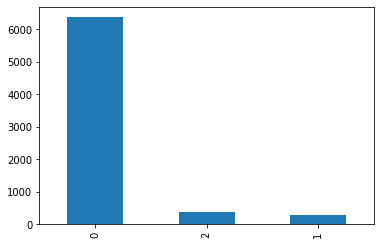

In [30]:
df.KMeans_cluster.value_counts().plot(kind='bar')

We see clearly a hight predominance in cluster 0 in comparison with the others.

Text(0.5, 1.0, 'PCA1 and PCA4')

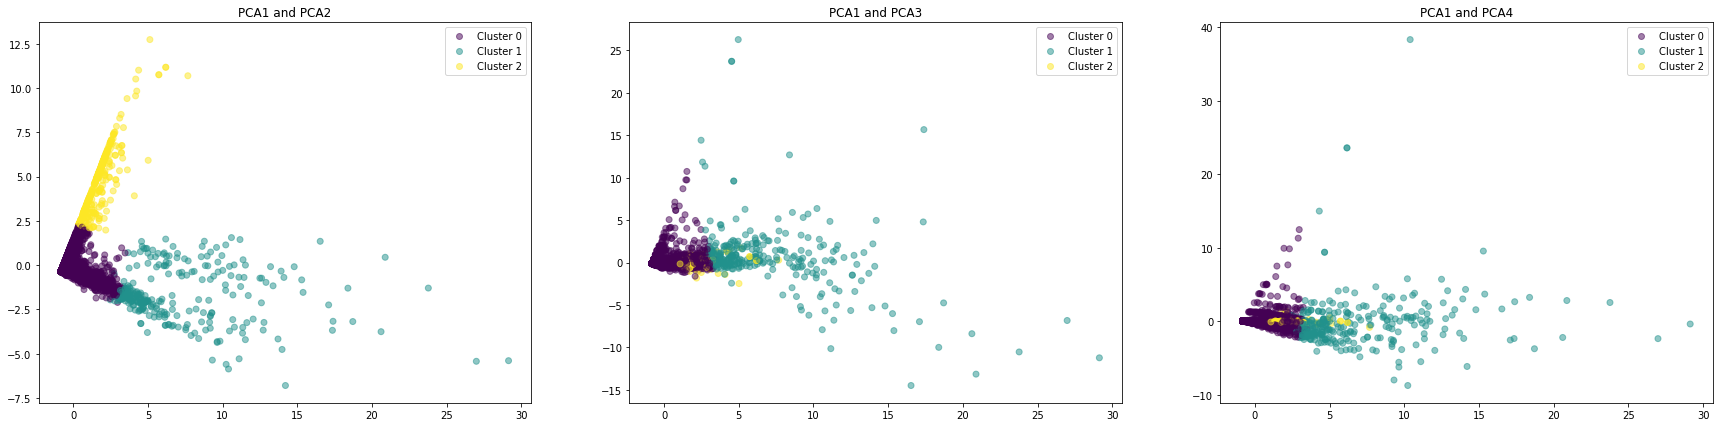

In [31]:
fig = plt.figure(figsize=(30,7))

plt.subplot(1,3,1)
plot1 = plt.scatter(x = df_pca['PCA1'], y = df_pca['PCA2'], c=y_pred, alpha = 0.5)
plt.legend(handles = plot1.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('PCA1 and PCA2')

plt.subplot(1,3,2)
plot2 = plt.scatter(x = df_pca['PCA1'], y = df_pca['PCA3'], c=y_pred, alpha = 0.5)
plt.legend(handles = plot2.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('PCA1 and PCA3')

plt.subplot(1,3,3)
plot3 = plt.scatter(x = df_pca['PCA1'], y = df_pca['PCA4'], c=y_pred, alpha = 0.5)
plt.legend(handles = plot3.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('PCA1 and PCA4')



We have a good definition of cluster 0 and 1 in all plots, however, cluster 2 is bad defined in plot 2 and 3

# Exercici 2

Classifica els diferents registres utilitant l'algoritme de clustering jeràrquic

In [32]:
df_pca

,PCA1,PCA2,PCA3,PCA4
0,2.258185,-0.121835,0.054851,-0.619547
1,-0.632356,0.047523,-0.063074,0.016419
2,0.101729,-0.057165,-0.174042,-0.193858
3,-0.681450,-0.061079,-0.078201,0.018923
4,-0.452503,0.170490,-0.074277,0.004253
...,...,...,...,...
7036,-0.709145,-0.122341,-0.086734,0.020335
7037,-0.709626,-0.370952,-0.160989,-0.000645
7038,-0.807492,-0.370436,-0.124437,0.025017
7039,-0.277290,0.556627,0.000171,-0.033755


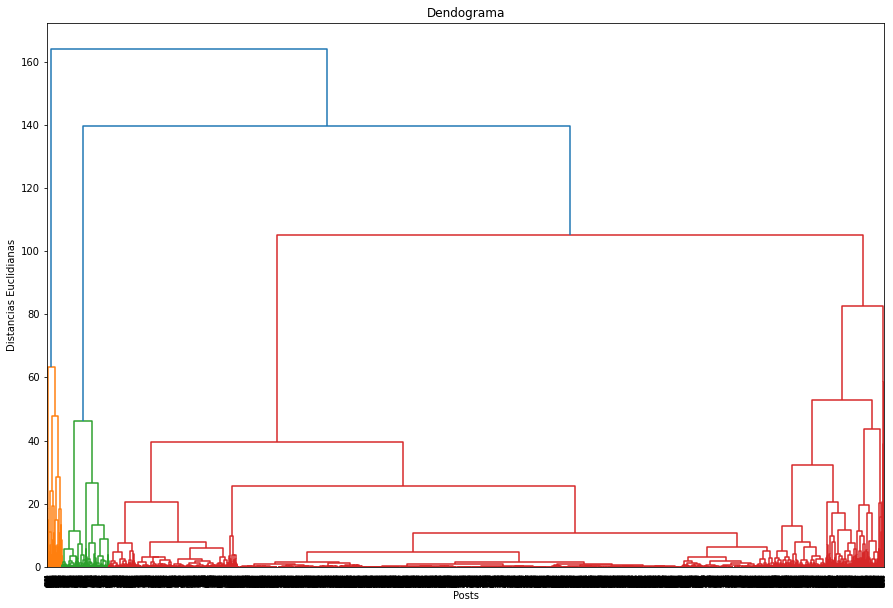

In [33]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))

dendrogram = sch.dendrogram(sch.linkage(df_pca, method= 'ward'))

plt.title('Dendograma')
plt.xlabel('Posts')
plt.ylabel('Distancias Euclidianas')
plt.show()

Seems that we have to do it with 3 clusters again.

In [34]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg.fit(df_pca)

AgglomerativeClustering(n_clusters=3)

In [35]:
y_pred = agg.fit_predict(df_pca)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
df['KMeans_cluster'] = y_pred
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video,KMeans_cluster
0,0.646268,0.322998,1.685546,0.482821,1.987952,0.196563,0.076818,0.473080,-0.155671,0,0,0,1,0
1,-0.172675,-0.252216,-0.304302,-0.144294,-0.318023,-0.147431,-0.175810,-0.152687,-0.155671,0,1,0,0,0
2,-0.006294,0.012921,0.128604,-0.024208,0.208341,-0.032766,0.076818,-0.152687,-0.155671,0,0,0,1,0
3,-0.256947,-0.252216,-0.304302,-0.231022,-0.318023,-0.147431,-0.175810,-0.152687,-0.155671,0,1,0,0,0
4,-0.036545,-0.252216,-0.304302,-0.024208,-0.092439,-0.147431,-0.175810,-0.152687,-0.155671,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,-0.304484,-0.252216,-0.304302,-0.279946,-0.318023,-0.147431,-0.175810,-0.152687,-0.155671,0,1,0,0,0
7046,-0.462223,-0.252216,-0.304302,-0.446732,-0.292958,-0.147431,0.076818,-0.152687,-0.155671,0,1,0,0,0
7047,-0.492474,-0.252216,-0.304302,-0.475641,-0.292958,-0.147431,-0.175810,-0.152687,-0.155671,0,1,0,0,0
7048,0.261646,-0.238735,-0.137215,0.298244,-0.267893,-0.147431,-0.175810,-0.152687,-0.155671,0,1,0,0,0


In [37]:
df['KMeans_cluster'].value_counts()

0    6524
2     394
1     123
Name: KMeans_cluster, dtype: int64

Text(0.5, 1.0, 'PCA1 and PCA4')

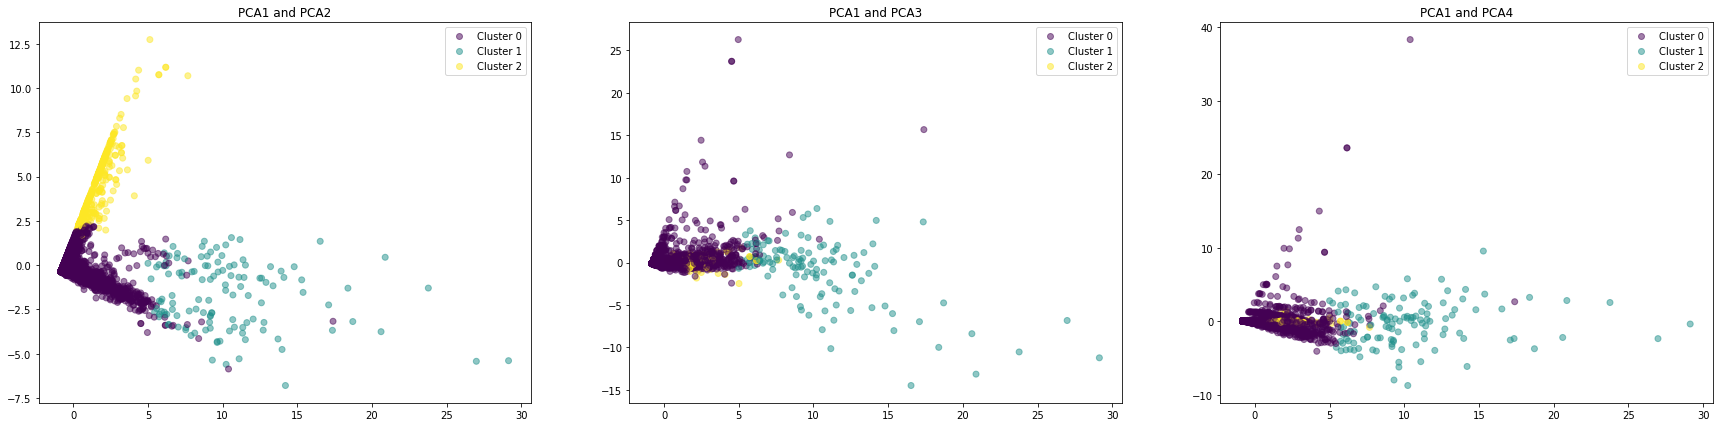

In [38]:
fig = plt.figure(figsize=(30,7))

plt.subplot(1,3,1)
plot1 = plt.scatter(x = df_pca['PCA1'], y = df_pca['PCA2'], c=y_pred, alpha = 0.5)
plt.legend(handles = plot1.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('PCA1 and PCA2')

plt.subplot(1,3,2)
plot2 = plt.scatter(x = df_pca['PCA1'], y = df_pca['PCA3'], c=y_pred, alpha = 0.5)
plt.legend(handles = plot2.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('PCA1 and PCA3')

plt.subplot(1,3,3)
plot3 = plt.scatter(x = df_pca['PCA1'], y = df_pca['PCA4'], c=y_pred, alpha = 0.5)
plt.legend(handles = plot3.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('PCA1 and PCA4')

In this clustering we have a similar result with k-means but now cluster 0 has a bit more values and in general there is less definition betweet the three clusters

# Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.


We are going to evaluate the silhouette score for 2, 3, 4, 5 number of cluster get get the most optimal one.

clusters 2 : 0.813
clusters 3 : 0.772
clusters 4 : 0.765
clusters 5 : 0.745


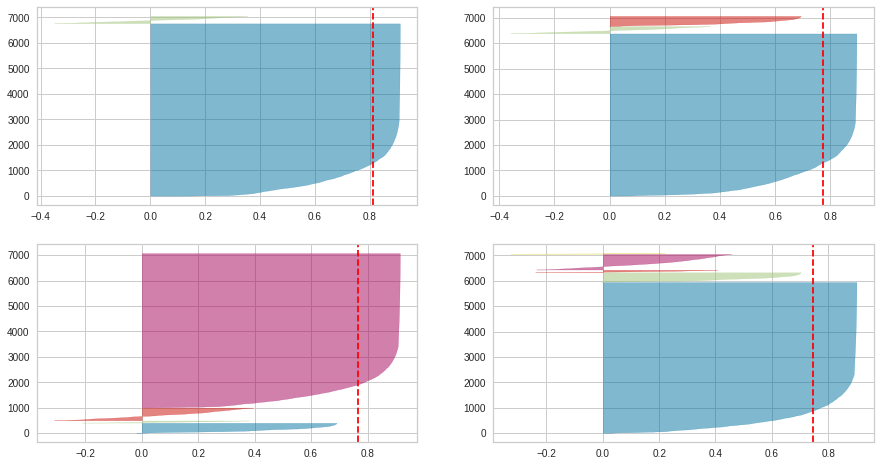

In [41]:
from yellowbrick.cluster import SilhouetteVisualizer

scores = dict()
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_pca)
    scores[i] = visualizer.silhouette_score_
_ = [print("clusters", k,":",f'{v:.3f}') for k,v in scores.items()]


As we see, the maximum silhouette score is for 2 clusters (0.813).